In [72]:
import pandas as pd
import geopandas as gp
import pylab as pl
import os
import json
import urllib2 as urllib
import zipfile 

%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### 1. Data download and cleaning

In [176]:
# Energy use data

eUse_url = 'https://data.cityofnewyork.us/resource/m46j-75iy.csv'
eUse_data = pd.read_csv(eUse_url)

In [177]:
eUse_data.head()

,automatic_water_benchmarking_eligible,bbls_co_reported,borough,co_reported_bbl_status,direct_ghg_emissions_mtco2e,dof_benchmarking_submission_status,dof_number_of_buildings,dof_property_floor_area_buildngs_and_parking_ft2,energy_star_score,indirect_ghg_emissions_mtco2e,...,reported_property_floor_area_building_s_ft,reported_water_method,site_eui_kbtu_ft2,source_eui_kbtu_ft2,street_name,street_number,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code
0,NaN,1000410001,Manhattan,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,918919,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
1,Yes,NaN,Queens,NaN,NaN,No Submission Matched to BBL,1.0,82730.0,NaN,NaN,...,NaN,None,NaN,NaN,108 STREET,63-10,NaN,NaN,NaN,11375.0
2,NaN,2027620097,Bronx,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,64200,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
3,No,NaN,Manhattan,NaN,NaN,No Submission Matched to BBL,1.0,440360.0,NaN,NaN,...,NaN,None,NaN,NaN,11 AVENUE,201,NaN,NaN,NaN,10001.0
4,NaN,2048300034,Bronx,NaN,NaN,Not on Covered Buildings List,NaN,NaN,Not Available,NaN,...,50000,None,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN


In [178]:
eUse_data.columns

Index([u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'borough', u'co_reported_bbl_status', u'direct_ghg_emissions_mtco2e',
       u'dof_benchmarking_submission_status', u'dof_number_of_buildings',
       u'dof_property_floor_area_buildngs_and_parking_ft2',
       u'energy_star_score', u'indirect_ghg_emissions_mtco2e',
       u'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       u'nyc_borough_block_and_lot_bbl',
       u'primary_property_type_self_selected', u'record_number',
       u'reported_nyc_building_identificaiton_numbers_bins',
       u'reported_property_floor_area_building_s_ft', u'reported_water_method',
       u'site_eui_kbtu_ft2', u'source_eui_kbtu_ft2', u'street_name',
       u'street_number', u'total_ghg_emissions_mtco2e',
       u'weather_normalized_site_eui_kbtu_ft2',
       u'weather_normalized_source_eui_kbtu_ft2', u'zip_code'],
      dtype='object')

In [179]:
eUse_data.drop([u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'borough', u'co_reported_bbl_status', u'direct_ghg_emissions_mtco2e',
       u'dof_benchmarking_submission_status', u'dof_number_of_buildings',
       u'dof_property_floor_area_buildngs_and_parking_ft2',
       u'energy_star_score', u'indirect_ghg_emissions_mtco2e',
       u'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       u'primary_property_type_self_selected', u'record_number',
       u'reported_nyc_building_identificaiton_numbers_bins',
       u'reported_water_method',
       u'source_eui_kbtu_ft2', u'street_name',
       u'street_number',
       u'weather_normalized_site_eui_kbtu_ft2',
       u'weather_normalized_source_eui_kbtu_ft2', u'zip_code'], axis = 1, inplace = True)

In [180]:
eUse_data.head()

,nyc_borough_block_and_lot_bbl,reported_property_floor_area_building_s_ft,site_eui_kbtu_ft2,total_ghg_emissions_mtco2e
0,1.000410e+09,918919,NaN,NaN
1,4.021460e+09,NaN,NaN,NaN
2,2.027620e+09,64200,NaN,NaN
3,1.006700e+09,NaN,NaN,NaN
4,2.048300e+09,50000,NaN,NaN


In [181]:
eUse_data.dtypes # Checking data types

nyc_borough_block_and_lot_bbl                 float64
reported_property_floor_area_building_s_ft     object
site_eui_kbtu_ft2                              object
total_ghg_emissions_mtco2e                     object
dtype: object

In [182]:
eUse_data.shape # Checking number of observations 

(16170, 4)

In [183]:
eUse_data.isnull().sum() # Checking for NaN values 

nyc_borough_block_and_lot_bbl                  156
reported_property_floor_area_building_s_ft    2385
site_eui_kbtu_ft2                             3966
total_ghg_emissions_mtco2e                    3790
dtype: int64

In [184]:
eUse_data_num = eUse_data.apply(pd.to_numeric, errors = 'coerce') # Converting all data to numeric

In [185]:
eUse_data_num.isnull().sum() # Checking for NaN values after conversion 

nyc_borough_block_and_lot_bbl                  156
reported_property_floor_area_building_s_ft    3125
site_eui_kbtu_ft2                             4623
total_ghg_emissions_mtco2e                    4447
dtype: int64

In [186]:
eUse_data_num.dropna(inplace = True) # Dropping NaN values 

In [187]:
eUse_data_num.head()

,nyc_borough_block_and_lot_bbl,reported_property_floor_area_building_s_ft,site_eui_kbtu_ft2,total_ghg_emissions_mtco2e
16,1.013110e+09,330000.0,125.4,3556.4
44,1.010140e+09,841709.0,154.9,9525.0
45,4.002520e+09,390400.0,46.0,1356.2
56,4.004370e+09,528060.0,66.2,2641.2
64,1.007660e+09,59468.0,122.3,584.4


In [188]:
eUse_data_num.dtypes # Checking data types after conversion

nyc_borough_block_and_lot_bbl                 float64
reported_property_floor_area_building_s_ft    float64
site_eui_kbtu_ft2                             float64
total_ghg_emissions_mtco2e                    float64
dtype: object

In [189]:
eUse_data_num.isnull().sum() # Checking NaN values after conversion

nyc_borough_block_and_lot_bbl                 0
reported_property_floor_area_building_s_ft    0
site_eui_kbtu_ft2                             0
total_ghg_emissions_mtco2e                    0
dtype: int64

In [190]:
eUse_data_num.shape # Checking number of observations after conversion

(11437, 4)

In [201]:
eUse_data_num['Total energy use'] = eUse_data_num.reported_property_floor_area_building_s_ft * \
                                    eUse_data_num.site_eui_kbtu_ft2

In [202]:
eUse_data_num.head()

,nyc_borough_block_and_lot_bbl,reported_property_floor_area_building_s_ft,site_eui_kbtu_ft2,total_ghg_emissions_mtco2e,Total energy use
16,1.013110e+09,330000.0,125.4,3556.4,41382000.0
44,1.010140e+09,841709.0,154.9,9525.0,130380724.1
45,4.002520e+09,390400.0,46.0,1356.2,17958400.0
56,4.004370e+09,528060.0,66.2,2641.2,34957572.0
64,1.007660e+09,59468.0,122.3,584.4,7272936.4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3b366d7d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff3b2bad2d0>]], dtype=object)

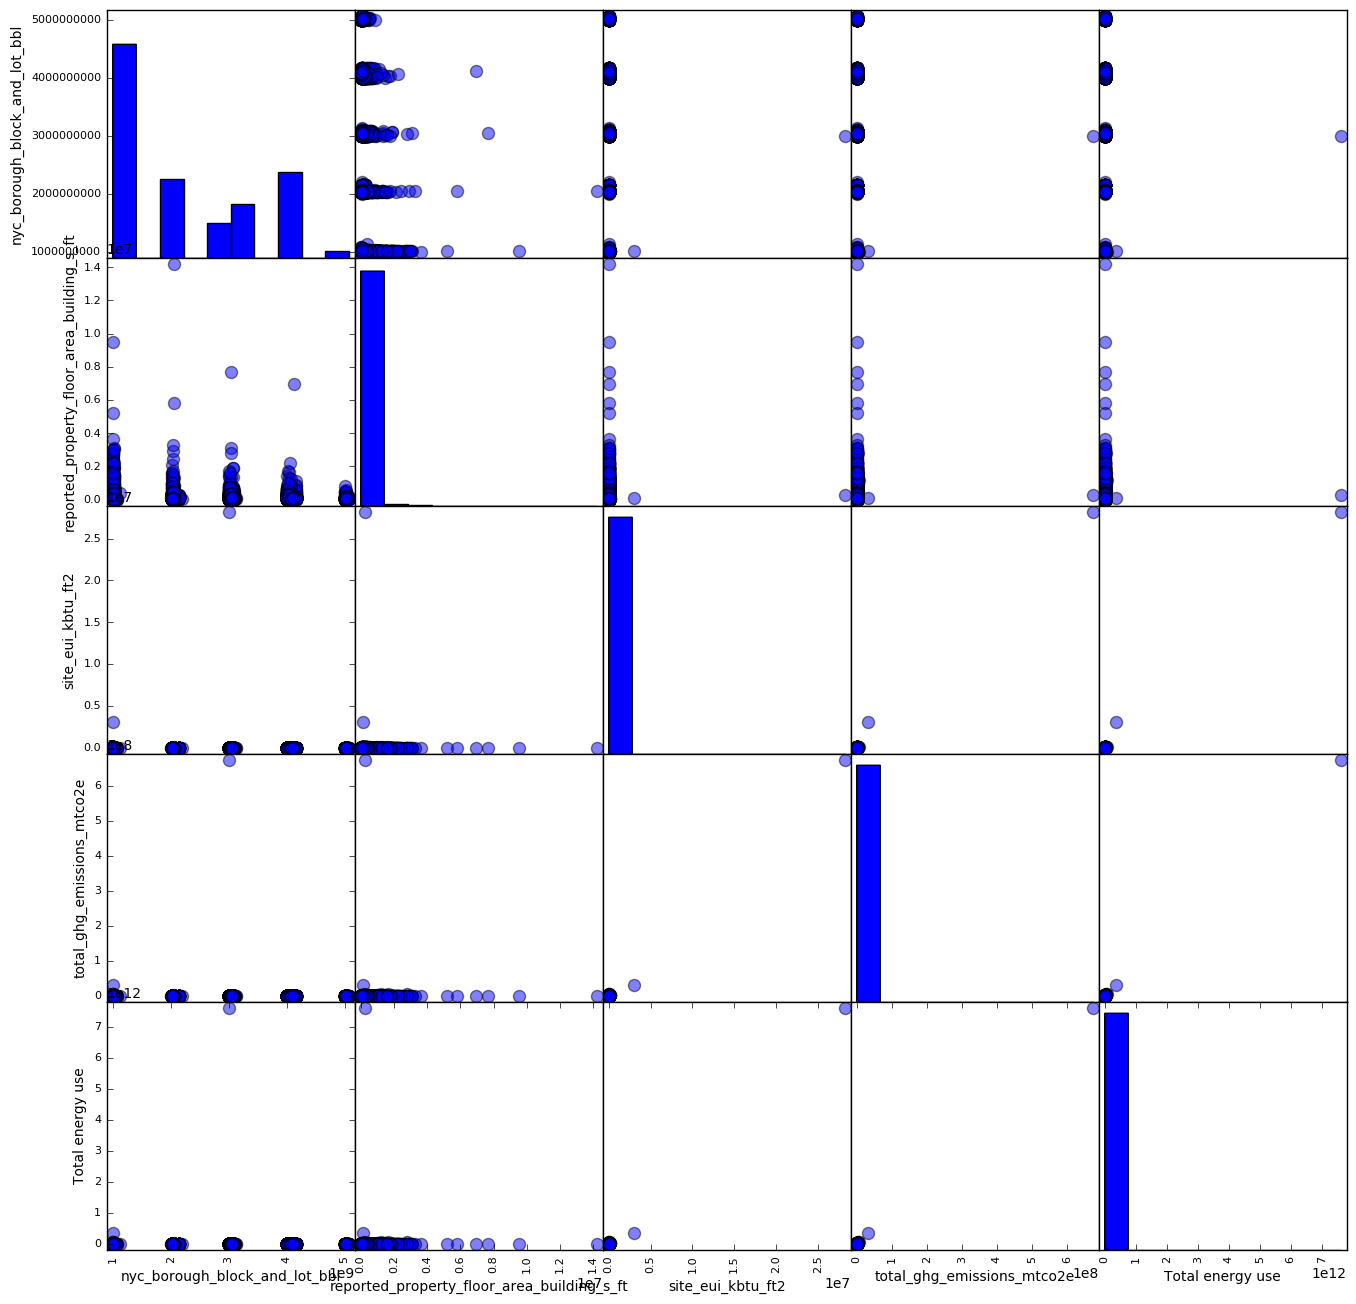

In [207]:
# Plotting all numeric variables against each other to get a general sense of any existing relationship 

from pandas.tools.plotting import scatter_matrix
scatter_matrix(eUse_data_num, s = 300, figsize = (16, 16))

In [191]:
# MPLUTO data 

os.system("unzip " + os.getenv("PUIDATA") + "/" + "mn_mappluto_16v1.zip")
zip_ref = zipfile.ZipFile(os.getenv('PUIDATA') + '/' + "mn_mappluto_16v1.zip", 'r')
zip_ref.extractall(os.getenv('PUIDATA'))
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile object at 0x7ff3e724f710>>

In [192]:
mpluto = gp.GeoDataFrame.from_file(os.getenv('PUIDATA') + '/' + "MNMapPLUTO.shp")

In [193]:
mpluto.head()

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,0.000000e+00,None,310 EAST 109 STREET,R7A,None,2,140102.0,343271.0,1.016800e+09,12000,...,0,1910,None,10029,R7A,None,None,None,6b,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,0.000000e+00,None,720 PARK AVENUE,R10/PI/LH-1A,R8B,2,5040000.0,30591900.0,1.013850e+09,203490,...,2006,1928,None,10021,R10,R8B,None,None,8c,"POLYGON ((994007.6886000037 219880.428399995, ..."
4,0.000000e+00,None,3 WEST 83 STREET,R8B,R10A,2,437850.0,1267200.0,1.011970e+09,13839,...,0,1900,None,10024,R8B,R10A,None,None,5d,"POLYGON ((992273.6850000024 224863.4904000014,..."


In [194]:
mpluto.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [195]:
mpluto.drop([u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
         u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidFAR',
       u'RetailArea', u'SHAPE_Area', u'SHAPE_Leng',    u'SPDist1',
          u'SPDist2',    u'Sanborn',  u'SanitBoro',  u'SanitDist',
         u'SanitSub', u'SchoolDist',  u'SplitZone',  u'StrgeArea',
           u'TaxMap',  u'Tract2010',   u'UnitsRes',
          u'Version',     u'XCoord',     u'YCoord', u'YearAlter1',
       u'YearAlter2',     u'ZMCode',    u'ZipCode',
        u'ZoneDist1',  u'ZoneDist2',  u'ZoneDist3',  u'ZoneDist4',
          u'ZoneMap',   u'geometry'], axis = 1, inplace = True)

In [196]:
mpluto.head() # Checking reduced dataframe

,BBL,UnitsTotal,YearBuilt
0,1.015450e+09,18,1920
1,1.007238e+09,50,1914
2,1.016800e+09,10,1910
3,1.013850e+09,32,1928
4,1.011970e+09,26,1900


In [197]:
mpluto.dtypes # Checking data types

BBL           float64
UnitsTotal      int64
YearBuilt       int64
dtype: object

In [198]:
mpluto.isnull().sum() # Checking for NaN values 

BBL           0
UnitsTotal    0
YearBuilt     0
dtype: int64

#### 2. Data merge

In [215]:
eUse_data_num.rename(columns = {'nyc_borough_block_and_lot_bbl' : 'BBL'}, inplace = True) # Renaming column 

In [216]:
eUse_data_num.columns

Index([u'BBL', u'reported_property_floor_area_building_s_ft',
       u'site_eui_kbtu_ft2', u'total_ghg_emissions_mtco2e',
       u'Total energy use'],
      dtype='object')

In [217]:
eUse_mpluto = pd.merge(eUse_data_num, mpluto, on = 'BBL')

In [218]:
eUse_mpluto.head()

,BBL,reported_property_floor_area_building_s_ft,site_eui_kbtu_ft2,total_ghg_emissions_mtco2e,Total energy use,UnitsTotal,YearBuilt
0,1.013110e+09,330000.0,125.4,3556.4,41382000.0,56,1977
1,1.010140e+09,841709.0,154.9,9525.0,130380724.1,2,1999
2,1.007660e+09,59468.0,122.3,584.4,7272936.4,8,1912
3,1.008150e+09,364000.0,117.0,3613.0,42588000.0,24,1954
4,1.005050e+09,235370.0,82.1,1392.3,19323877.0,24,1926


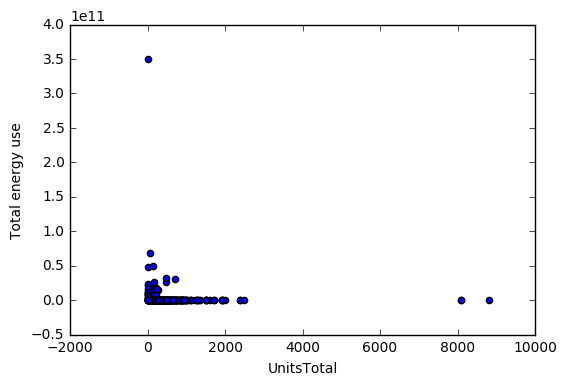

In [222]:
eUse_mpluto.plot.scatter('UnitsTotal', 'Total energy use')